Num GPUs Available:  0


C:\Users\ardahal\AppData\Local\Temp\ipykernel_10396\4053869473.py:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
c:\Users\ardahal\AppData\Local\anaconda3\envs\test\Lib\site-packages\keras\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 50)         │        12,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,651 (127.54 KB)

 Trainable params: 32,651 (127.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0523 - val_loss: 0.0275
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0224 - val_loss: 0.0244
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0190 - val_loss: 0.0213
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0173 - val_loss: 0.0186
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0164 - val_loss: 0.0201
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0159 - val_loss: 0.0176
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0154 - val_loss: 0.0169
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0152 - val_loss: 0.0166
Epoch 9/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0150 - val_loss: 0.0169
Epoch 10/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0146 - val_loss: 0.0164
Epoch 11/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0145 - val_loss: 0.0159
Epoch 12/25
449/449 ━━━━━━━━━━━

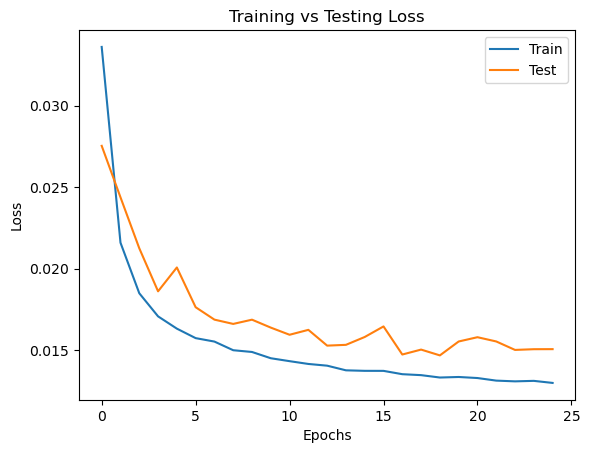

439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
RMSE: 0.12268188801122412
MAE: 0.07184745736378373
R2 Score: 0.7796376785199929


In [4]:
### LSTM wind
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM, Input
from keras.callbacks import EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from keras.optimizers import Adam
import seaborn as sns
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


# Verify GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Use GPU device 3 (indexing starts from 0)

# Data import
site_number = 1
data = pd.read_excel(f'datasets/datasets/Wind farm site {site_number} (Nominal capacity-99MW).xlsx') # Wind farm site 1 (Nominal capacity-99MW)
# data = pd.read_excel(f'datasets/Wind farm site {site_number} (Nominal capacity-200MW).xlsx')  # site 2: gelu gelu 72
# data = pd.read_excel(f'datasets/Wind farm site {site_number} (Nominal capacity-99MW).xlsx')  # site 3: relu
# data = pd.read_excel(f'datasets/Wind farm site {site_number} (Nominal capacity-66MW).xlsx') # site 4: relu gelu
# data = pd.read_excel(f'datasets/Wind farm site {site_number} (Nominal capacity-36MW).xlsx') # site 5: gelu relu
# data = pd.read_excel(f'datasets/Wind farm site {site_number} (Nominal capacity-96MW).xlsx') # site 6: relu



# Convert time column to datetime and correct invalid times
data['Time(year-month-day h:m:s)'] = data['Time(year-month-day h:m:s)'].apply(lambda x: str(x).replace(' 24:', ' 00:'))
data['Time(year-month-day h:m:s)'] = pd.to_datetime(data['Time(year-month-day h:m:s)'], format='%Y-%m-%d %H:%M:%S')

# Set time column as index
data.set_index('Time(year-month-day h:m:s)', inplace=True)

# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()


# Handle NaN values
data.fillna(method='ffill', inplace=True)



# Normalize the features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, :-1])  # All features except the last (target) column
        y.append(data[i, -1])  # Target column (Power output)
    return np.array(X), np.array(y)

# Number of timesteps in the input sequence
n_steps = 24  # For example, 24*15min = 6 hours of historical data to predict the next value

# Prepare input/output sequences
X, y = create_sequences(data_scaled.values, n_steps)

# Splitting data into training and testing sets (80-20 split)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the model with LSTM only
def LSTMModel(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.8))
    model.add(LSTM(50))
    model.add(Dropout(0.8))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Instantiate and compile the model
model_1 = LSTMModel((n_steps, X_train.shape[2]))
model_1.summary()

# Training the model
history = model_1.fit(X_train, y_train, epochs=25, batch_size=100, validation_split=0.2, verbose=1)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Training vs Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions
predictions_1 = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions_1))
mae = mean_absolute_error(y_test, predictions_1)
epsilon = 1e-8  # Small constant
mape = np.mean(np.abs((y_test - predictions_1) / (y_test + epsilon))) * 100
r2 = r2_score(y_test, predictions_1)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

# Save results to file
results_file = "wind_n24_lstm.txt"
with open(results_file, "a") as file:
    file.write(f"Site {site_number}:\n")
    file.write(f"RMSE: {rmse}\n")
    file.write(f"MAE: {mae}\n")
    file.write(f"R2 Score: {r2}\n")
    file.write("\n")